### REGRESIÓN LINEAL 9

## Intro Regresión Lineal


In [2]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. 
Para eso recordad que:

Deberéis separar la X y la y.

Deberéis crear el train y el test.

Ajustar vuestro modelo.

In [3]:
df = pd.read_csv('../datos/df_regresion.csv', index_col = 0)
df.head()

,City,Product_line,Unit_price,Quantity,Tax_5,Total,RATING_LOG,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,mes_compra_February,mes_compra_January,mes_compra_March,Customer_type_Member,Customer_type_Normal,hora_compra_oe
0,2,3.5,0.718160,0.509930,0.919607,0.919607,1.157015,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
1,2,1.0,-1.525303,-0.174540,-0.987730,-0.987730,1.364384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
2,2,2.0,-0.352781,0.509930,0.071446,0.071446,0.355296,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,2,3.5,0.096214,0.852165,0.675780,0.675780,0.846698,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
4,2,1.0,1.156959,0.509930,1.267125,1.267125,-0.938704,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


Vamos a crear el primer modelo. 

Comenzaremos separando la variable respuesta y las predictoras. Después el conjunto de datos en los de entrenamiento y test, con una proporción de 0.80 y 0.20 respectivamente.

Iniciaremos la regresión lineal indicando que se usen todos los núcleos del ordenador con n_jobs. 

Para que el modelo aprenda le paseremos los datos de entrenamiento con .fit. 

Después usaremos .predict de sklearn para hacer las predicciones y veremos los resultados. 

In [4]:
X = df.drop('RATING_LOG', axis = 1)
y = df['RATING_LOG']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
lr = LinearRegression(n_jobs=-1)

In [7]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
y_predict_train = lr.predict(x_train) # predicciones para datos de entrenamiento
y_predict_test = lr.predict(x_test) # predicciones para datos de test

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
29,0.355296,0.016935,Train
535,0.355296,0.285131,Train
695,-0.088260,0.013952,Train
557,-1.573077,-0.102416,Train
836,-0.725244,0.090083,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,0.355296,0.016935,Train,0.338362
535,0.355296,0.285131,Train,0.070165
695,-0.088260,0.013952,Train,-0.102211
557,-1.573077,-0.102416,Train,-1.470661
836,-0.725244,0.090083,Train,-0.815327


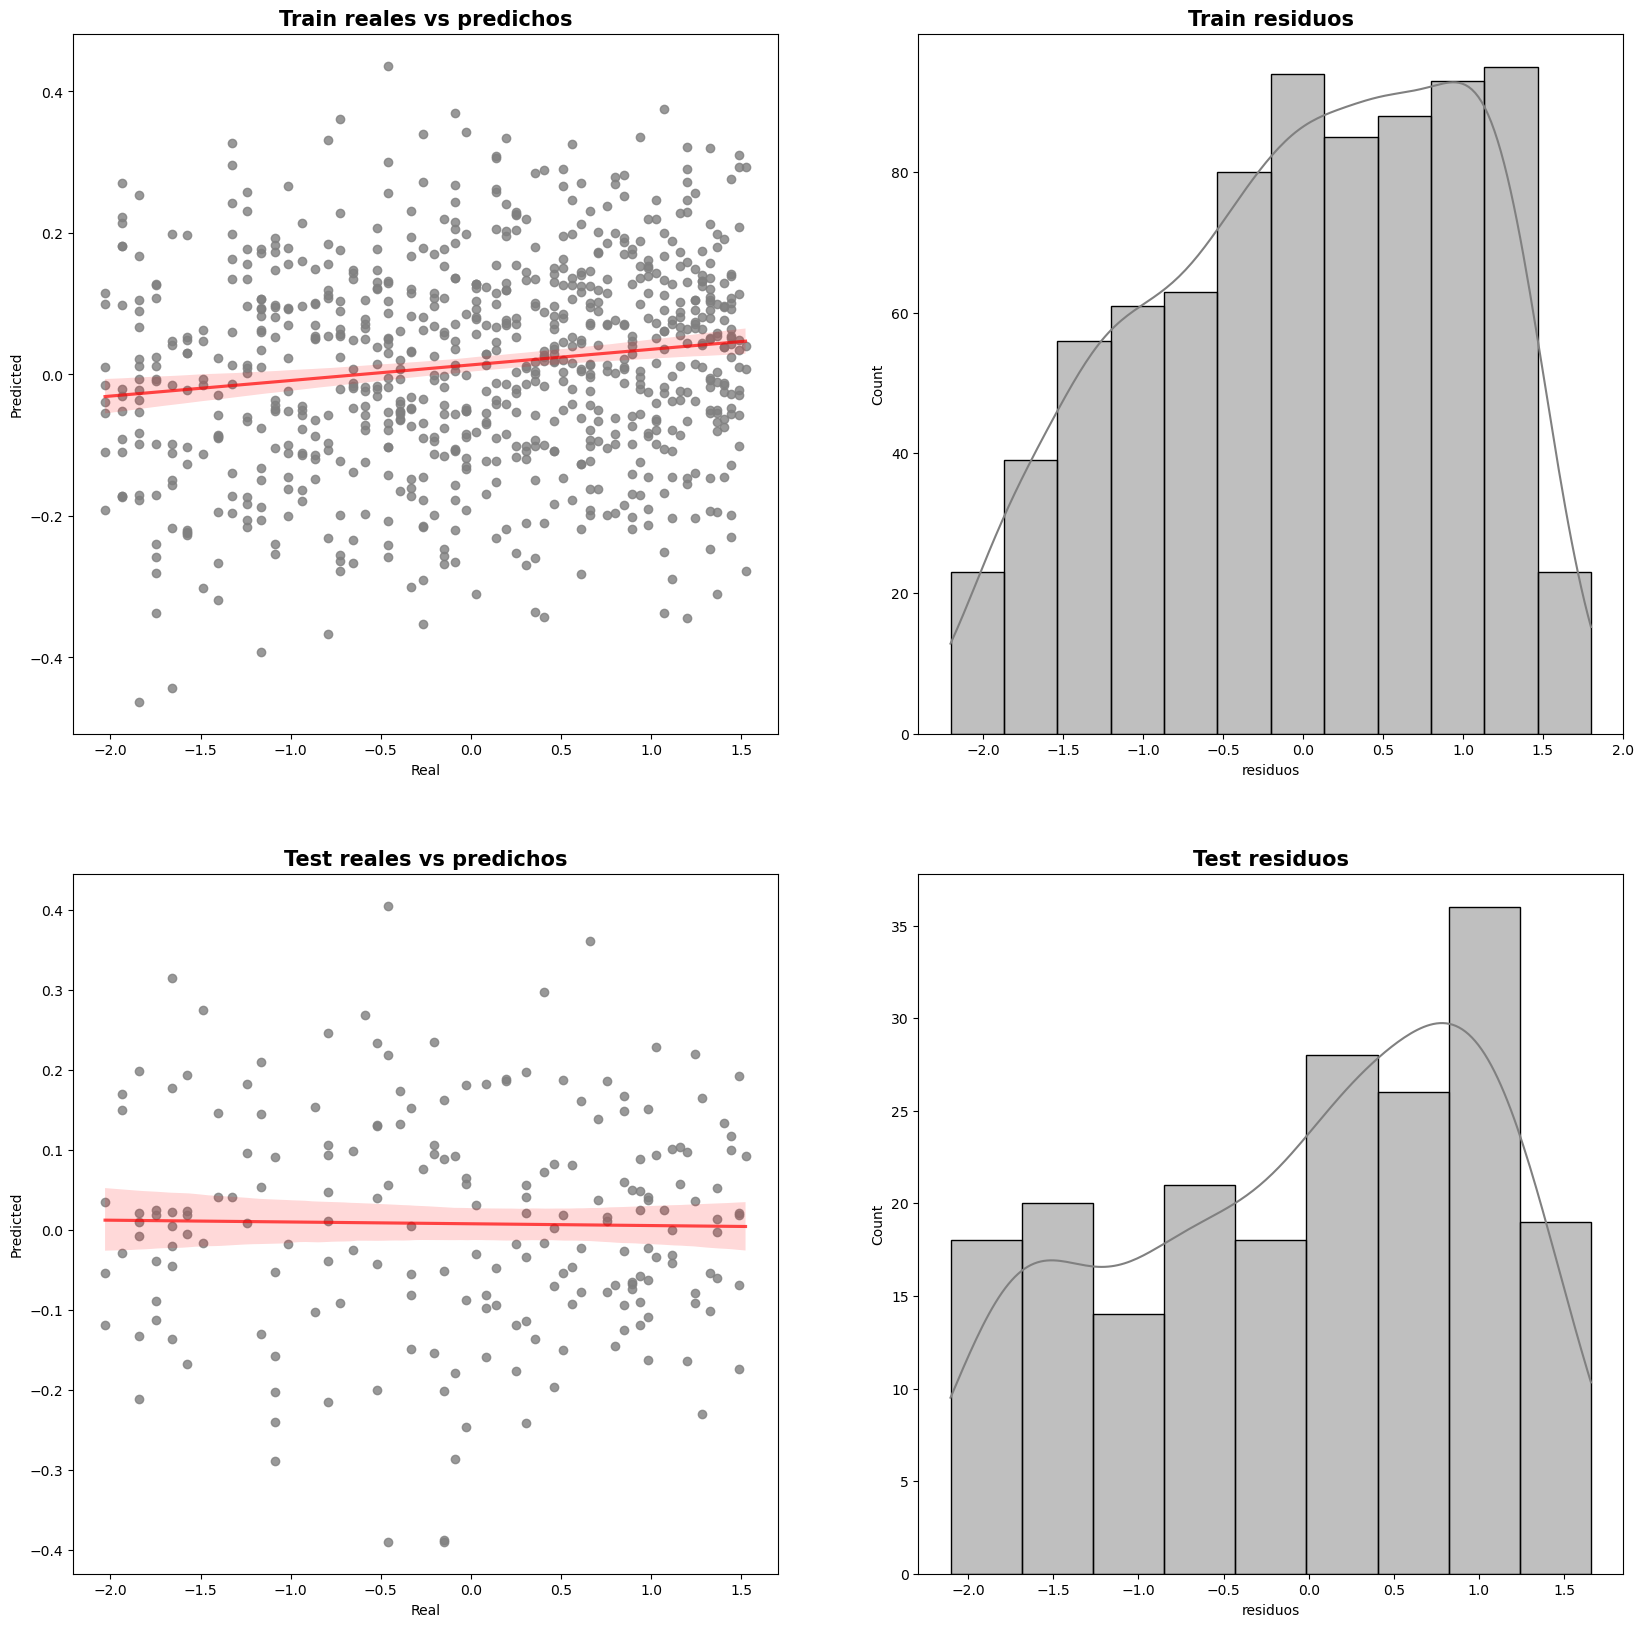

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


Este modelo como ya sabíamos no es el indicado, por lo tanto, tendremos que probar con otros.